<a href="https://colab.research.google.com/github/Thamindu17/BTC/blob/main/btc_lstm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance ta tensorflow scikit-learn matplotlib


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=24b4bb7d8fccae0372737a23c2953b4fafa9810a74f7a924f1749df0881f4cc3
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [3]:
btc_df = yf.download("BTC-USD", period="365d", interval="1h")
btc_df = btc_df[['Close']].dropna()
btc_df.head()


/tmp/ipython-input-3-210975080.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc_df = yf.download("BTC-USD", period="365d", interval="1h")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,BTC-USD
Datetime,
2024-07-30 00:00:00+00:00,66543.687500
2024-07-30 01:00:00+00:00,66187.335938
2024-07-30 02:00:00+00:00,66392.710938
2024-07-30 03:00:00+00:00,66593.695312
2024-07-30 04:00:00+00:00,66683.882812


In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(btc_df)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LEN = 50  # sequence length (50 previous time steps)
X, y = create_sequences(scaled_data, SEQ_LEN)

# Train/test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [5]:
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - loss: 0.0159
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0017
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 0.0016
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - loss: 0.0013
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0013
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0012
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - loss: 0.0011
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - loss: 9.3022e-04
Epoch 9/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 9.5366e-04
Epoch 10/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - loss: 8.7225e-04


55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step


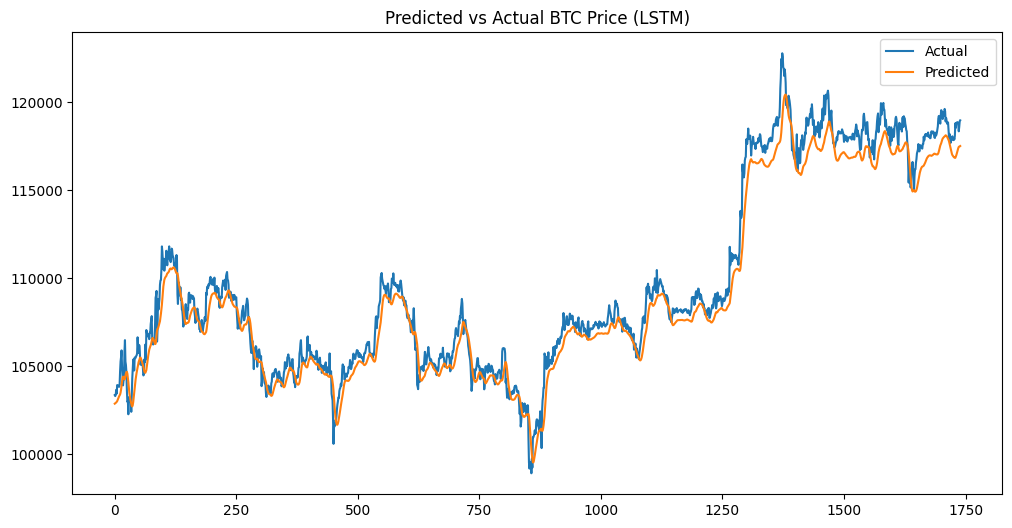

Mean Squared Error: 1071970.2668185884


In [6]:
# Predict
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test)

# Plot
plt.figure(figsize=(12,6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title("Predicted vs Actual BTC Price (LSTM)")
plt.legend()
plt.show()

# Error
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Mean Squared Error: {mse}")
